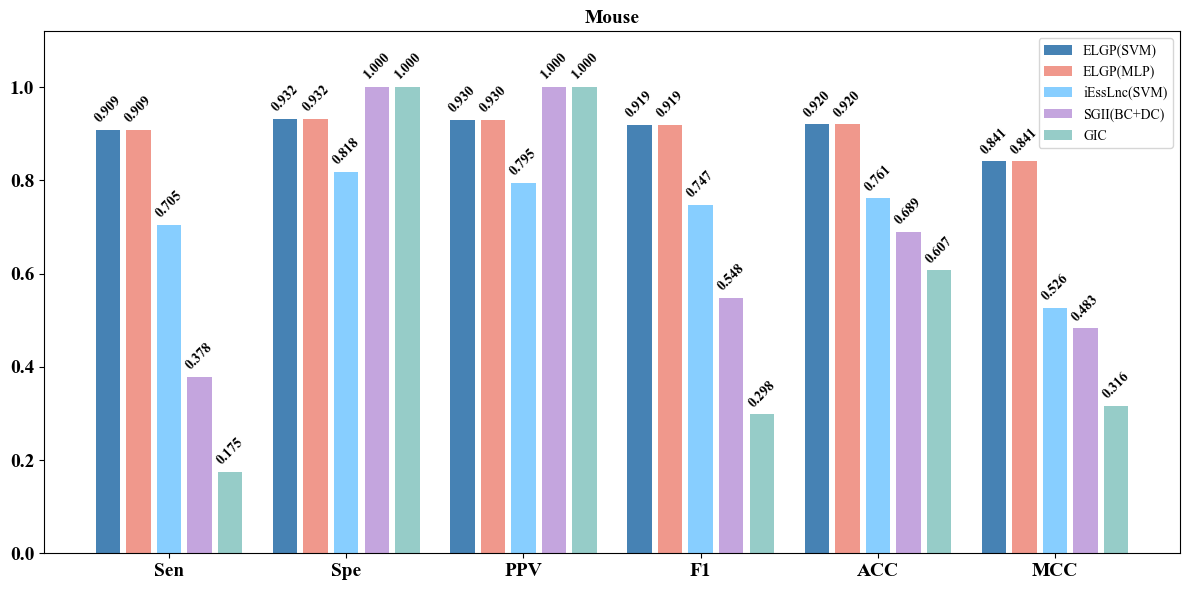

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

# 设置字体
rcParams['font.family'] = 'Times New Roman'

# 读取数据
df = pd.read_csv('mouse_compare_metrics.csv')
df.set_index('Model', inplace=True)

models = df.index.tolist()
metrics = df.columns.tolist()
num_models = len(models)
num_metrics = len(metrics)

# 参数设置
bar_width = 0.1
spacing = 0.025
group_width = num_models * (bar_width + spacing) + 0.1
x = np.arange(0, num_metrics * group_width, group_width)

colors = ['#4682B4', '#F0988C', '#87CEFF', '#C4A5DE', '#96CCC8']

plt.figure(figsize=(12, 6))

for i, model in enumerate(models):
    bar_positions = x + i * (bar_width + spacing)
    values = df.loc[model].values
    bars = plt.bar(bar_positions, values, width=bar_width,
                   color=colors[i % len(colors)], label=model)

    for bar in bars:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2, height + 0.01,
            f'{height:.3f}',
            ha='center', va='bottom',
            fontsize=10,
            fontweight='bold',
            rotation=45
        )

# 设置图形标签
plt.legend(prop={'weight': 'bold', 'size': 8})
plt.title('Mouse', fontsize=14, fontweight='bold')
plt.yticks(fontweight='bold', fontsize=14)
plt.ylim(0, 1.12)
plt.xticks(x + ((num_models - 1) / 2) * (bar_width + spacing), metrics, fontweight='bold', fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("mouse_compare.svg")
plt.show()


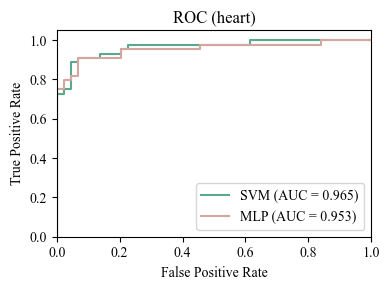

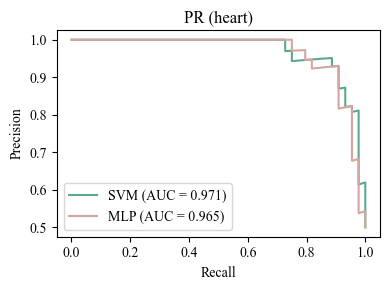

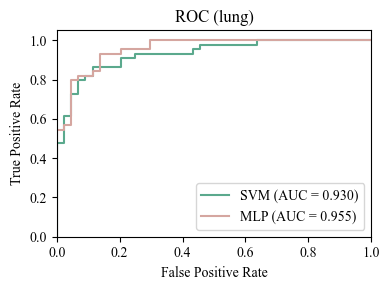

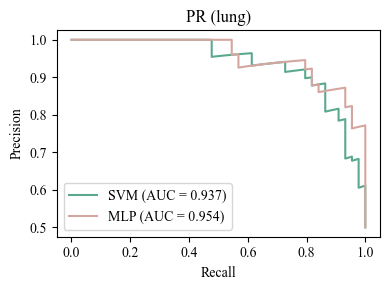

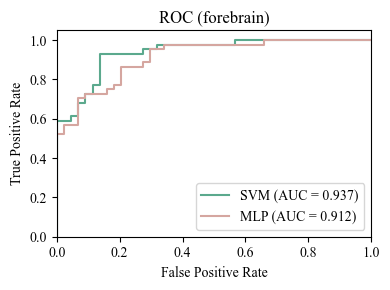

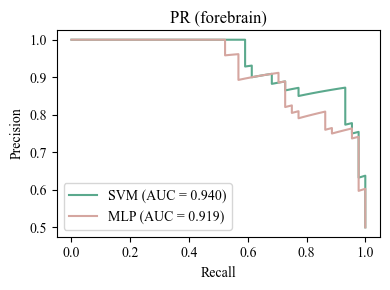

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import auc
from matplotlib import rcParams
import os

rcParams['font.family'] = 'Times New Roman'

color_list = ['#5BA98D', '#D5A6A0']
line_width = 1.5
human_tissue_dict={'heart':'heart left ventricle','lung':'left lung','stomach':'stomach'}
mouse_tissue_dict={'heart':'heart','lung':'lung','brain':'forebrain'}
model_mode = 'ELGP(HinSAGE)'
model_names = ['SVM','MLP']

for tissue in mouse_tissue_dict.keys():
    tissue_name = mouse_tissue_dict[tissue]
    feature_sets = {}
    for model_name in model_names:
        
        folder_path = f'../../classifier/{model_name}/performance/mouse/curve'

        roc_file = f'{folder_path}/roc_curve_{tissue}_{model_mode}.csv'
        pr_file = f'{folder_path}/pr_curve_{tissue}_{model_mode}.csv'
        feature_sets[model_name] = (roc_file, pr_file)

    # ===== 绘制 ROC 曲线 =====
    plt.figure(figsize=(4, 3))
    for i, (name, (roc_file, _)) in enumerate(feature_sets.items()):
        data = pd.read_csv(roc_file)
        fpr, tpr = data["FPR"], data["TPR"]
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.3f})",
                color=color_list[i % len(color_list)], linewidth=line_width)

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title(f"ROC ({tissue_name})")
        plt.legend(loc="lower right")
        plt.tight_layout()
        plt.savefig(f"mouse/{tissue}_ROC_compare.svg")

    # ===== 绘制 PR 曲线 =====
    plt.figure(figsize=(4, 3))
    for i, (name, (_, pr_file)) in enumerate(feature_sets.items()):
        data = pd.read_csv(pr_file)
        recall, precision = data["Recall"], data["Precision"]
        pr_auc = auc(recall, precision)
        plt.plot(recall, precision, label=f"{name} (AUC = {pr_auc:.3f})",
                color=color_list[i % len(color_list)], linewidth=line_width)

    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"PR ({tissue_name})")
    plt.legend(loc="lower left")
    plt.tight_layout()
    plt.savefig(f"mouse/{tissue}_PR_compare.svg")
